In [1]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import skimage
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Flatten
from tensorflow.keras import datasets, layers, models

import gc


2024-04-14 18:41:10.369943: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 18:41:11.872531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 26

def get_data(folder, max_images_per_class=250):
    X = []
    y = []
    labels = {}
    label_index = 0
    for folderName in sorted(os.listdir(folder)):
        if not folderName.startswith('.'):
            labels[folderName] = label_index
            image_count = 0
            for image_filename in os.listdir(os.path.join(folder, folderName)):
                if image_count >= max_images_per_class:
                    break
                img_file = cv2.imread(os.path.join(folder, folderName, image_filename))
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    X.append(img_file)
                    y.append(label_index)
                    image_count += 1
            label_index += 1
    return np.array(X), np.array(y)

train_dir = "./asl_dataset/"
X_train, y_train = get_data(train_dir, 1000)

print("Images successfully imported...")

print("Images successfully imported...")

Images successfully imported...
Images successfully imported...


In [3]:
print("the Shape of x train is : ", X_train.shape)
print("the Shape of y train is : ", y_train.shape)

the Shape of x train is :  (1815, 64, 64, 3)
the Shape of y train is :  (1815,)


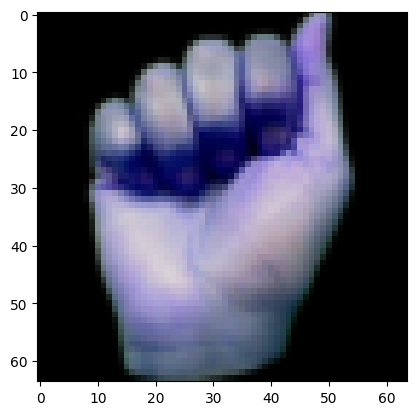

In [4]:
plt.imshow(X_train[0])
plt.show()

In [5]:
# Data Processingtotal
X_data = X_train
y_data = y_train

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [6]:
print(np.max(y_train))
print(num_classes)

25
26


In [7]:
# One-Hot-Encoding the categorical data

num_classes = np.max(y_train) + 1
y_cat_train = to_categorical(y_train, num_classes)
y_cat_test = to_categorical(y_test, num_classes)

In [8]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(X_test.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(1270, 64, 64, 3)
(545, 64, 64, 3)
(545, 64, 64, 3)
(545,)
(1270, 26)
(545, 26)


In [9]:
# CPU and RAM save

import gc
del X_data
del y_data
gc.collect()

3506

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

model.summary()

/home/sachithrka/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,986 (4.73 MB)

 Trainable params: 1,240,986 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [12]:
history = model.fit(X_train, y_cat_train, 
          epochs=20,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test))

Epoch 1/20
20/20 - 6s - 306ms/step - accuracy: 0.4110 - loss: 2.0854 - val_accuracy: 0.7560 - val_loss: 0.7886
Epoch 2/20
20/20 - 4s - 211ms/step - accuracy: 0.8409 - loss: 0.4640 - val_accuracy: 0.8954 - val_loss: 0.3145
Epoch 3/20
20/20 - 4s - 210ms/step - accuracy: 0.9394 - loss: 0.1729 - val_accuracy: 0.9303 - val_loss: 0.1928
Epoch 4/20
20/20 - 4s - 216ms/step - accuracy: 0.9780 - loss: 0.0800 - val_accuracy: 0.9633 - val_loss: 0.1256
Epoch 5/20
20/20 - 4s - 209ms/step - accuracy: 0.9890 - loss: 0.0323 - val_accuracy: 0.9780 - val_loss: 0.0638
Epoch 6/20
20/20 - 4s - 209ms/step - accuracy: 0.9953 - loss: 0.0135 - val_accuracy: 0.9798 - val_loss: 0.0771
Epoch 7/20
20/20 - 4s - 210ms/step - accuracy: 0.9969 - loss: 0.0085 - val_accuracy: 0.9780 - val_loss: 0.0924
Epoch 8/20
20/20 - 4s - 214ms/step - accuracy: 0.9961 - loss: 0.0101 - val_accuracy: 0.9780 - val_loss: 0.0786
Epoch 9/20
20/20 - 4s - 211ms/step - accuracy: 0.9961 - loss: 0.0127 - val_accuracy: 0.9835 - val_loss: 0.0630
E

In [13]:
metrics = pd.DataFrame(model.history.history)
metrics

# 11 epochs are the limit for the maximum accuracy

,accuracy,loss,val_accuracy,val_loss
0,0.411024,2.085385,0.755963,0.788578
1,0.840945,0.464002,0.895413,0.314460
2,0.939370,0.172883,0.930275,0.192759
3,0.977953,0.079967,0.963303,0.125648
4,0.988976,0.032337,0.977982,0.063808
5,0.995276,0.013519,0.979816,0.077084
6,0.996850,0.008543,0.977982,0.092360
7,0.996063,0.010086,0.977982,0.078591
8,0.996063,0.012733,0.983486,0.062952
9,0.996063,0.011891,0.972477,0.079164


18/18 - 0s - 24ms/step - accuracy: 0.9817 - loss: 0.0478


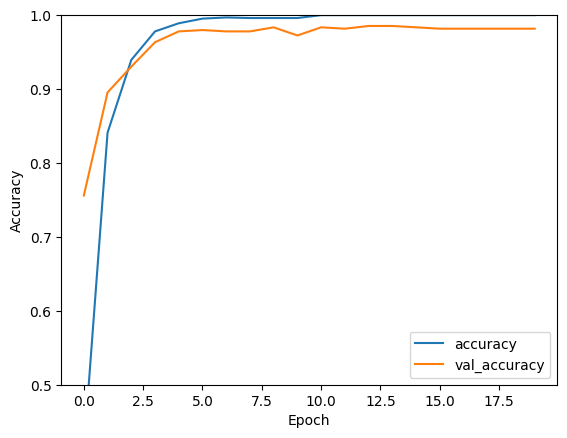

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_cat_test, verbose=2)

In [15]:
print(test_acc)

0.9816513657569885


In [16]:
train_dir_test = "./asl_alphabet_test/"
xx_train, yy_train = get_data(train_dir_test)

print("Images successfully imported...")

Images successfully imported...


In [17]:
from tensorflow.keras.models import load_model

predictions = model.predict(xx_train)

print("Predictions successfully made...")

204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step
Predictions successfully made...


In [18]:
from sklearn.metrics import classification_report
import numpy as np

predictions_class = np.argmax(predictions, axis=1)

print(classification_report(yy_train, predictions_class))

              precision    recall  f1-score   support

           0       0.02      0.04      0.03       250
           1       0.00      0.00      0.00       250
           2       0.00      0.00      0.00       250
           3       0.00      0.00      0.00       250
           4       0.00      0.00      0.00       250
           5       0.00      0.00      0.00       250
           6       0.11      0.04      0.06       250
           7       0.27      0.03      0.05       250
           8       0.00      0.00      0.00       250
           9       0.03      0.27      0.05       250
          10       0.00      0.00      0.00       250
          11       0.00      0.00      0.00       250
          12       0.03      0.08      0.04       250
          13       0.03      0.05      0.04       250
          14       0.00      0.00      0.00       250
          15       0.07      0.00      0.01       250
          16       0.14      0.03      0.05       250
          17       0.00    

/home/sachithrka/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sachithrka/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sachithrka/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Save the model
model.save('asl_model.h5')
